# Pymaceuticals Inc.
---

### Analysis
The mean shows us that Capomulin and Ramicane both have a standard error of mean being at 0.32 meaning that they are both compareable to each other when compared in the tumor volume. 
 
The study shows that they used an almost even amount of male and female mice, male mice at 51% and females at 49%. 

Infubol is the only one that has outliers when compared to the other drug regimens

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study= pd.merge(mouse_metadata,study_results, how="left", on= ["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_count= mouse_metadata["Mouse ID"].count()
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
#timepoint_df=mouse_study["Timepoint"].unique()
#mouse_id_df=mouse_study["Mouse ID"].unique()

duplicate_mouse_id=mouse_study.loc[mouse_study.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()


# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#timepoint_df
#mouse_id_df
duplicate_mouse_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_cleaned= mouse_study[mouse_study.duplicated("Mouse ID")]
mouse_cleaned.head()
mouse_cleaned.count()

Mouse ID              1644
Drug Regimen          1644
Sex                   1644
Age_months            1644
Weight (g)            1644
Timepoint             1644
Tumor Volume (mm3)    1644
Metastatic Sites      1644
dtype: int64

In [5]:
mouse_cleaned.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_cleaned_2= mouse_study[mouse_study["Mouse ID"].isin(duplicate_mouse_id)==False]
mouse_cleaned_2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
len(mouse_cleaned_2["Mouse ID"].unique())
print(mouse_cleaned_2)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumor_mean= mouse_cleaned_2.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_median= mouse_cleaned_2.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_var=mouse_cleaned_2.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_tumor= mouse_cleaned_2.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tumor=mouse_cleaned_2.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()



# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
combined_mouse=pd.merge(pd.merge(pd.merge(pd.merge(tumor_mean,tumor_median, on='Drug Regimen', 
                        how='left'),tumor_var, on='Drug Regimen', how='left'),std_tumor, on='Drug Regimen', how='left'),
                       sem_tumor, on='Drug Regimen', how='left')

remaned_study= combined_mouse.rename(columns={'mean':'Mean Tumor Volume','median':'Median Tumor Volume','var':
                                              'Tumor Volume Variance','dev':'Tumor Volume Std. Dev','sem':'Tumor Volume Stc. Err'})

remaned_study

C:\Users\valdi\AppData\Local\Temp\ipykernel_2876\752860456.py:15: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Tumor Volume (mm3)_x'} in the result is deprecated and will raise a MergeError in a future version.
  combined_mouse=pd.merge(pd.merge(pd.merge(pd.merge(tumor_mean,tumor_median, on='Drug Regimen',


,Tumor Volume (mm3)_x,Tumor Volume (mm3)_y,Tumor Volume (mm3)_x,Tumor Volume (mm3)_y,Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
mean = mouse_study.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':'mean'})
median = mouse_study.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':'median'})
var = mouse_study.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':'var'})
std = mouse_study.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':'std'})
sem = mouse_study.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':'sem'})

# Using the aggregation method, produce the same summary statistics in a single line
grouped_mouse=mouse_study.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].aggregate(['mean','median','var','std','sem'])
grouped_mouse


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

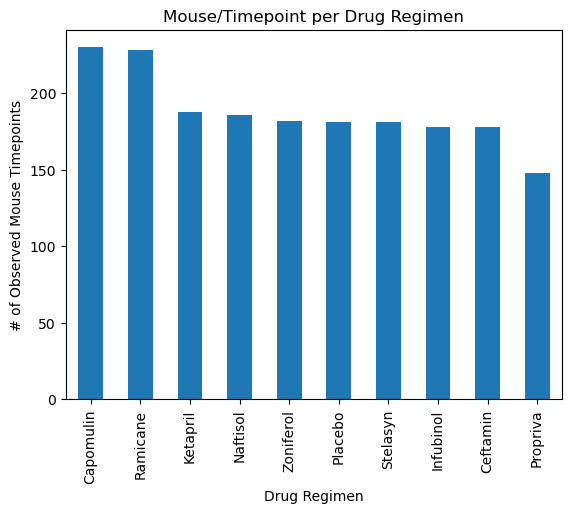

In [22]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drugs = mouse_cleaned_2["Drug Regimen"].value_counts()

bar_1 = drugs.plot(kind='bar',title='Mouse/Timepoint per Drug Regimen',xlabel='Drug Regimen',ylabel='# of Observed Mouse Timepoints')
xticklabels = drugs.index
plt.show()

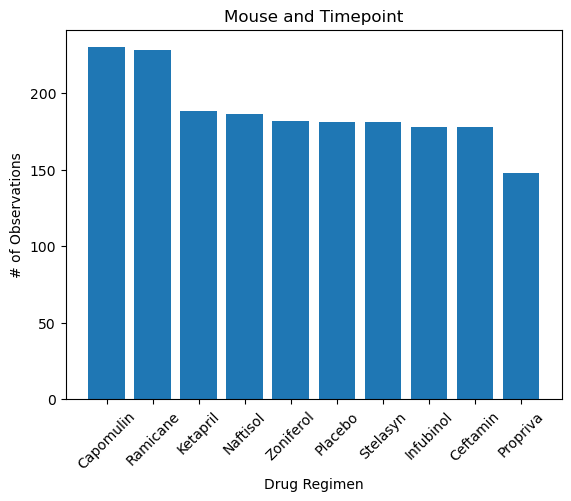

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = drugs.index
y_axis = drugs.values

plt.title('Mouse and Timepoint')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observations')
plt.xticks(rotation=45)
plt.bar(x_axis,y_axis)
plt.show()

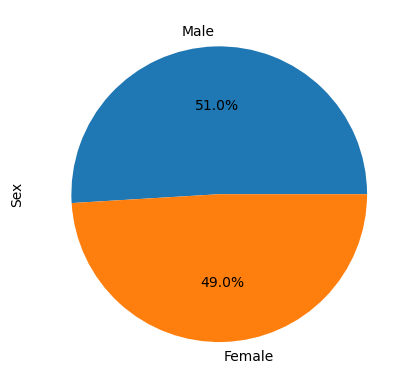

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = mouse_cleaned_2['Sex'].value_counts()
gender
pie_1 = gender.plot(kind='pie',y=gender, autopct='%1.1f%%')
plt.show()

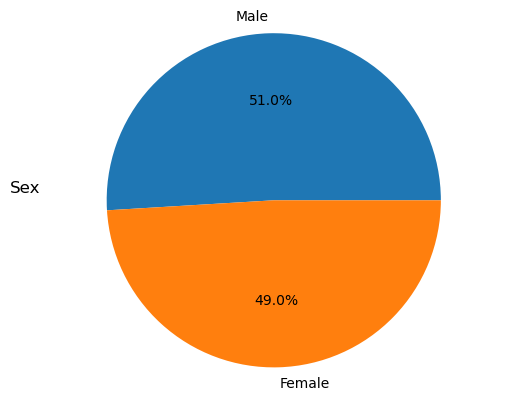

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = gender.index
number_sex = gender.values
number_sex

plt.title("Sex", x=0, y=.5)
plt.pie(number_sex, labels=sex, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin =mouse_cleaned_2.loc[mouse_study["Drug Regimen"]=="Capomulin"]
ramicane = mouse_cleaned_2.loc[mouse_study["Drug Regimen"]=="Ramicane"]
infubinol = mouse_cleaned_2.loc[mouse_study["Drug Regimen"]=="Infubinol"]
ceftamin = mouse_cleaned_2.loc[mouse_study["Drug Regimen"]=="Ceftamin"]
# Start by getting the last (greatest) timepoint for each mouse
capomulin_greatest = capomulin.groupby('Mouse ID').max()['Timepoint']
capomulin_greatest_df = pd.DataFrame(capomulin_greatest)
ramicane_greatest = ramicane.groupby('Mouse ID').max()['Timepoint']
ramicane_greatest_df = pd.DataFrame(ramicane_greatest)
infubinol_greatest = infubinol.groupby("Mouse ID").max()['Timepoint']
infubinol_greatest_df = pd.DataFrame(infubinol_greatest)
ceftamin_greatest = ceftamin.groupby('Mouse ID').max()['Timepoint']
ceftamin_greatest_df = pd.DataFrame(ceftamin_greatest)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
capomul_greatest_volume = pd.merge(capomulin_greatest_df,mouse_study,on=('Mouse ID','Timepoint'),how='left')
ramican_greatest_volume = pd.merge(ramicane_greatest_df,mouse_study,on=('Mouse ID','Timepoint'),how='left')
infubol_greatest_volume = pd.merge(infubinol_greatest_df,mouse_study,on=('Mouse ID','Timepoint'),how='left')
ceftami_greatest_volume = pd.merge(ceftamin_greatest_df,mouse_study,on=('Mouse ID'),how='left')


In [15]:
# Put treatments into a list for for loop (and later for plot labels)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
cap_tumor = capomul_greatest_volume['Tumor Volume (mm3)']
quar_cap = cap_tumor.quantile([0.25,0.5,0.75])
cap_lower_q = quar_cap[0.25]
cap_higher_q = quar_cap[0.75]
cap_iqr = cap_higher_q-cap_lower_q
cap_lower_bound = cap_lower_q-(1.5*cap_iqr)
cap_higher_bound = cap_higher_q+(1.5*cap_iqr)

ram_tumor = ramican_greatest_volume['Tumor Volume (mm3)']
quar_ram = ram_tumor.quantile([0.25,0.5,0.75])
ram_lower_q = quar_ram[0.25]
ram_higher_q = quar_ram[0.75]
ram_iqr = ram_higher_q-ram_lower_q
ram_lower_bound = ram_lower_q-(1.5*ram_iqr)
ram_higher_bound = ram_higher_q+(1.5*ram_iqr)

inf_tumor = infubol_greatest_volume['Tumor Volume (mm3)']
quar_inf = inf_tumor.quantile([0.25,0.5,0.75])
inf_lower_q = quar_inf[0.25]
inf_higher_q = quar_inf[0.75]
inf_iqr = inf_higher_q-inf_lower_q
inf_lower_bound = inf_lower_q-(1.5*inf_iqr)
inf_higher_bound = inf_higher_q+(1.5*inf_iqr)

cef_tumor = ceftami_greatest_volume['Tumor Volume (mm3)']
quar_cef = cef_tumor.quantile([0.25,0.5,0.75])
cef_lower_q = quar_cef[0.25]
cef_higher_q = quar_cef[0.75]
cef_iqr = cef_higher_q-cef_lower_q

cef_lower_bound = cef_lower_q-(1.5*cef_iqr)
cef_higher_bound = cef_higher_q+(1.5*cef_iqr)

    # Determine outliers using upper and lower bounds
cap_outliers = cap_tumor.loc[(cap_tumor<cap_lower_bound)|(cap_tumor>cap_higher_bound)]
ram_outliers = ram_tumor.loc[(ram_tumor<ram_lower_bound)|(ram_tumor>ram_higher_bound)]
inf_outliers = inf_tumor.loc[(inf_tumor<inf_lower_bound)|(inf_tumor>inf_higher_bound)]
cef_outliers = cef_tumor.loc[(cef_tumor<cef_lower_bound)|(cef_tumor>cef_higher_bound)]
print(f"Capomulin's potential outliers: {cap_outliers}")
print(f"Ramicane's potential outliers: {ram_outliers}")
print(f"Infubinol's potential outliers: {inf_outliers}")
print(f"Ceftamine's potential outliers: {cef_outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 5    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamine's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


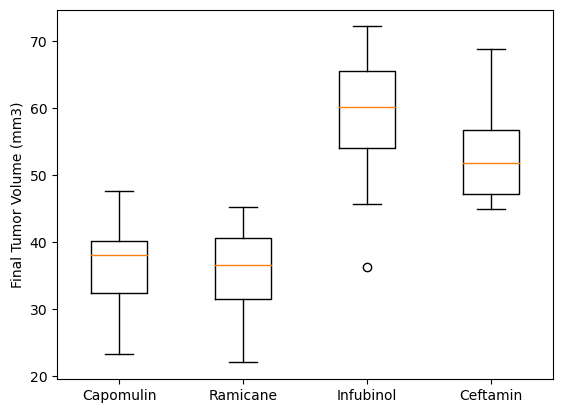

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plot_group = [cap_tumor,ram_tumor,inf_tumor,cef_tumor]

fig1,ax1=plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(plot_group, labels=['Capomulin','Ramicane','Infubinol','Ceftamin'])
plt.show()

## Line and Scatter Plots

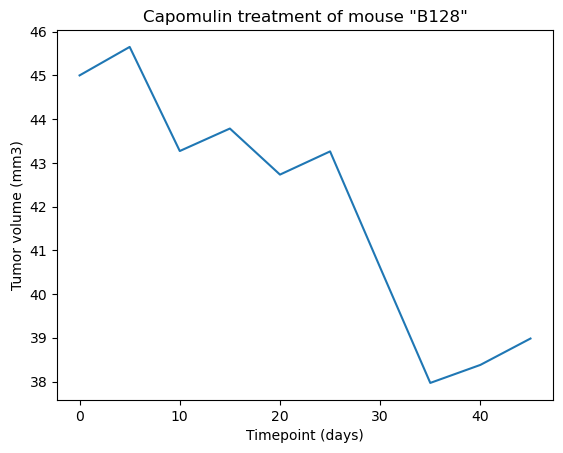

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomul_df= mouse_cleaned_2.loc[(mouse_study["Drug Regimen"]=="Capomulin"),:]
capomulin = capomulin.loc[capomulin['Mouse ID']=='b128']

time=capomulin['Timepoint'].unique()

tumor=capomulin['Tumor Volume (mm3)'].unique()

plt.plot(time,tumor)
plt.title('Capomulin treatment of mouse "B128"')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor volume (mm3)')
plt.show()

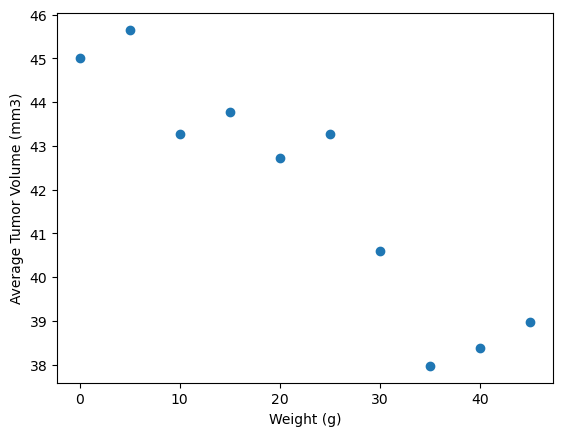

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
tumor_weight=capomulin.groupby('Mouse ID')['Weight (g)'].mean()
tumor_volume=capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
tumor_weight
tumor_volume
plt.scatter(time,tumor)
plt.xlabel("Weight (g)")
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between the mouse weight and the average tumor volume is that -0.93


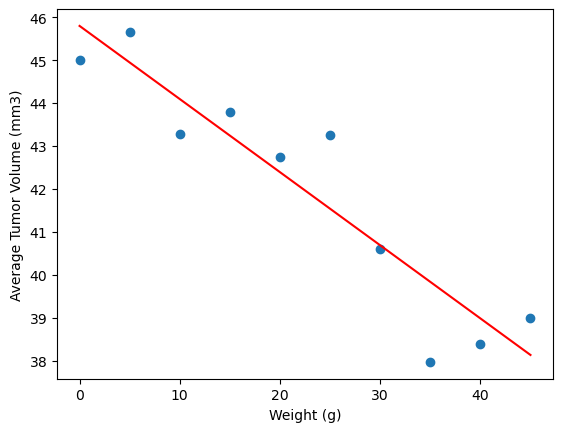

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy import stats


correlation=st.pearsonr(time,tumor)
print(f"The correlation between the mouse weight and the average tumor volume is that {round(correlation[0],2)}")

p_slope, p_int, p_r, p_p, p_std_err = stats.linregress(time, tumor)
p_fit = p_slope * time + p_int
plt.scatter(time, tumor)
plt.plot(time,p_fit,'r-')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()